In [55]:
import os
import sys
import glob
import pandas as pd
import seaborn as sns
import numpy as  np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()

In [2]:
pd.__version__

'0.24.2'

In [3]:
# Import Preprocessed Simulated Read Data with Mash Distance

In [4]:
%%bash
mkdir -p ../data
curl -L https://osf.io/ueb9v/download -o ../data/simreads-compare.dnainput.processed.mashD.csv.gz
ls ../data

simreads-compare.dnainput.csv.gz
simreads-compare.dnainput.mrcc.csv.gz
simreads-compare.dnainput.processed.csv.gz
simreads-compare.dnainput.processed.mashD.csv.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1170      0 --:--:-- --:--:-- --:--:--  1167
100 11.0M  100 11.0M    0     0  3293k      0  0:00:03  0:00:03 --:--:-- 4962k


In [5]:
mDF = pd.read_csv("../data/simreads-compare.dnainput.processed.mashD.csv.gz")
mDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,jaccard_pdist,contain_pdist
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,4974666,5189923,1637423,dna-21,5082294.5,0.047855,0.053935,0.033459
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,49849,52176,16567,dna-21,5082294.5,0.047855,0.053555,0.033113
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,5001,5163,1717,dna-21,5082294.5,0.047855,0.051673,0.031955
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,2494,2590,858,dna-21,5082294.5,0.047855,0.051719,0.031884
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,4974660,5189923,993907,dna-31,5082291.5,0.047855,0.052641,0.035467


In [18]:
# make a "true ANI" column
mDF["true ANI"] = 1 - mDF["true p-distance"]
mDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,jaccard_pdist,contain_pdist,mjdist_diff,true ANI
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,4974666,5189923,1637423,dna-21,5082294.5,0.047855,0.053935,0.033459,-0.006081,0.952145
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,49849,52176,16567,dna-21,5082294.5,0.047855,0.053555,0.033113,-0.005701,0.952145
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,5001,5163,1717,dna-21,5082294.5,0.047855,0.051673,0.031955,-0.003818,0.952145
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,2494,2590,858,dna-21,5082294.5,0.047855,0.051719,0.031884,-0.003865,0.952145
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,4974660,5189923,993907,dna-31,5082291.5,0.047855,0.052641,0.035467,-0.004787,0.952145


In [20]:
mDF.shape

(155143, 20)

In [21]:
mDF["mjdist_diff"] = mDF["true p-distance"] - mDF["jaccard_pdist"]
mDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,jaccard_pdist,contain_pdist,mjdist_diff,true ANI
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,4974666,5189923,1637423,dna-21,5082294.5,0.047855,0.053935,0.033459,-0.006081,0.952145
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,49849,52176,16567,dna-21,5082294.5,0.047855,0.053555,0.033113,-0.005701,0.952145
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,5001,5163,1717,dna-21,5082294.5,0.047855,0.051673,0.031955,-0.003818,0.952145
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,2494,2590,858,dna-21,5082294.5,0.047855,0.051719,0.031884,-0.003865,0.952145
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,4974660,5189923,993907,dna-31,5082291.5,0.047855,0.052641,0.035467,-0.004787,0.952145


In [22]:
# there are some comparisons with no k-mers/hashes in common -- let's eliminate these
mDF = mDF[mDF["num_common"] != 0]
mDF.shape

(155143, 20)

In [23]:
# let's just work with scaled=1 to start:
m1DF = mDF[mDF["scaled"] == 1]
m1DF.shape

(50650, 20)

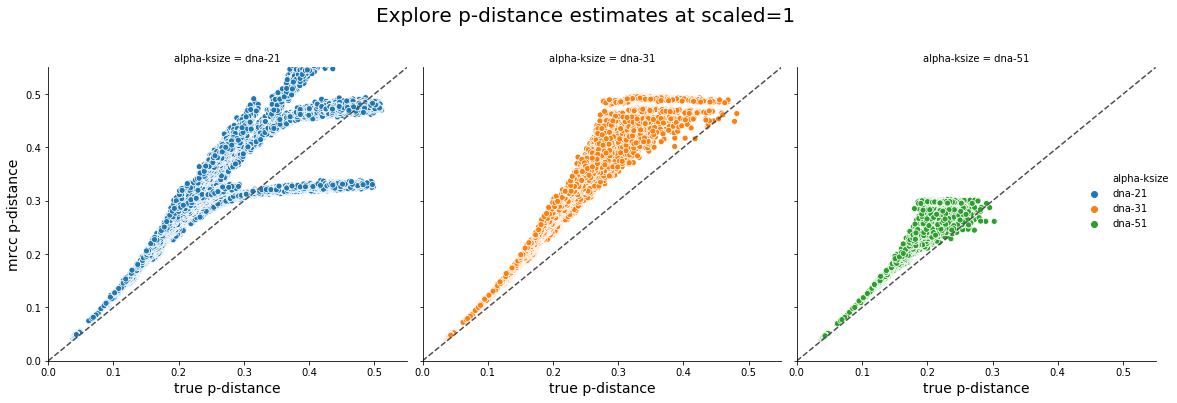

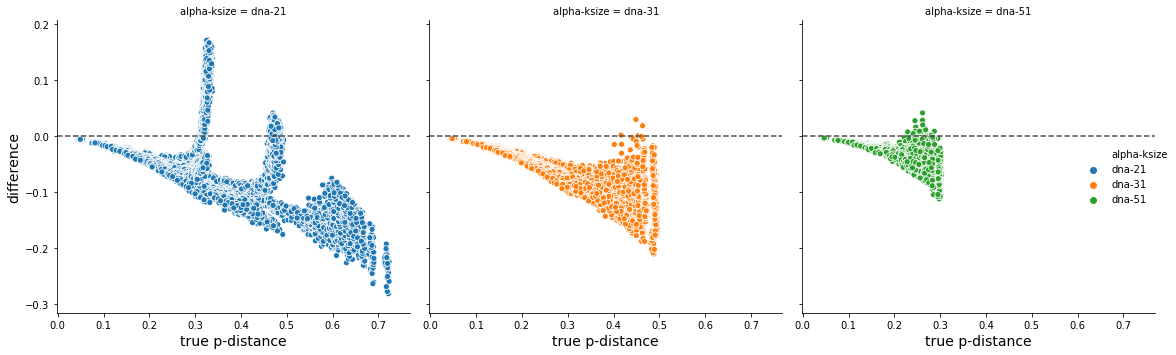

In [24]:
data_to_plot = m1DF # select dataframe to plot with

g = sns.relplot(data=data_to_plot, x="true p-distance", y="jaccard_pdist", col="alpha-ksize", hue="alpha-ksize")#, palette="GnBu_d")
g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.1), yticks=np.arange(0, 0.60, 0.1))
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("mrcc p-distance", size=14)
g.add_legend()
g.fig.suptitle("Explore p-distance estimates at scaled=1", x=0.5, y=1.10, size=20)

d = sns.relplot(data=data_to_plot, x="jaccard_pdist", y="mjdist_diff", col="alpha-ksize", hue="alpha-ksize")
for ax in d.fig.axes:
    ax.axhline(0, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("difference", size=14)
d.add_legend()

In [25]:
mDF_3 = m1DF[m1DF["num_common"] >= 3]

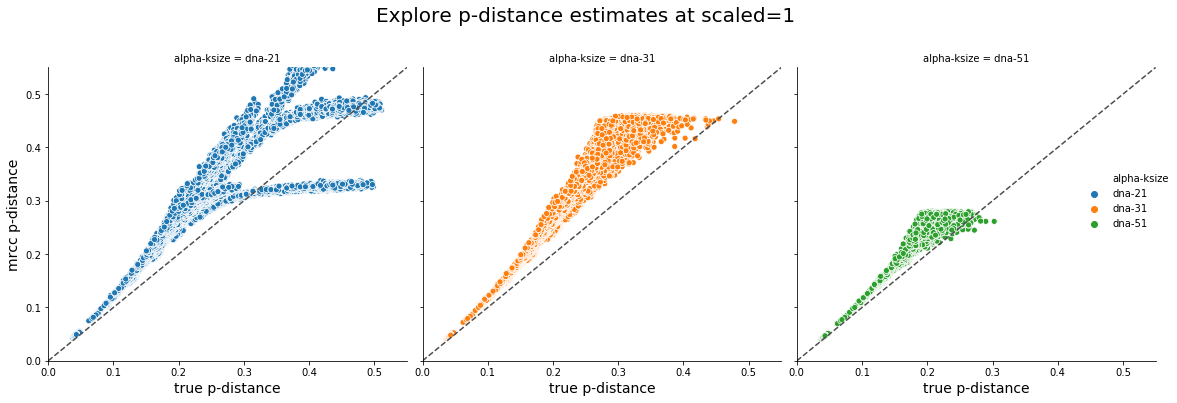

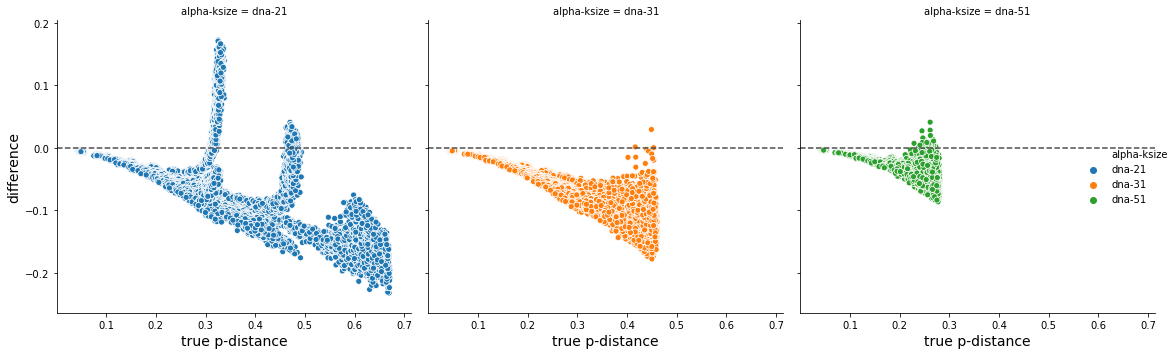

In [26]:
data_to_plot = mDF_3 # select dataframe to plot with

g = sns.relplot(data=data_to_plot, x="true p-distance", y="jaccard_pdist", col="alpha-ksize", hue="alpha-ksize")#, palette="GnBu_d")
g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.1), yticks=np.arange(0, 0.60, 0.1))
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("mrcc p-distance", size=14)
g.add_legend()
g.fig.suptitle("Explore p-distance estimates at scaled=1", x=0.5, y=1.10, size=20)

d = sns.relplot(data=data_to_plot, x="jaccard_pdist", y="mjdist_diff", col="alpha-ksize", hue="alpha-ksize")
for ax in d.fig.axes:
    ax.axhline(0, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("difference", size=14)
d.add_legend()

# Plot Jaccard to true pdistance / ANI

Text(0.5, 1.1, 'Simulated DNA Sequences: Jaccard vs True p-distance')

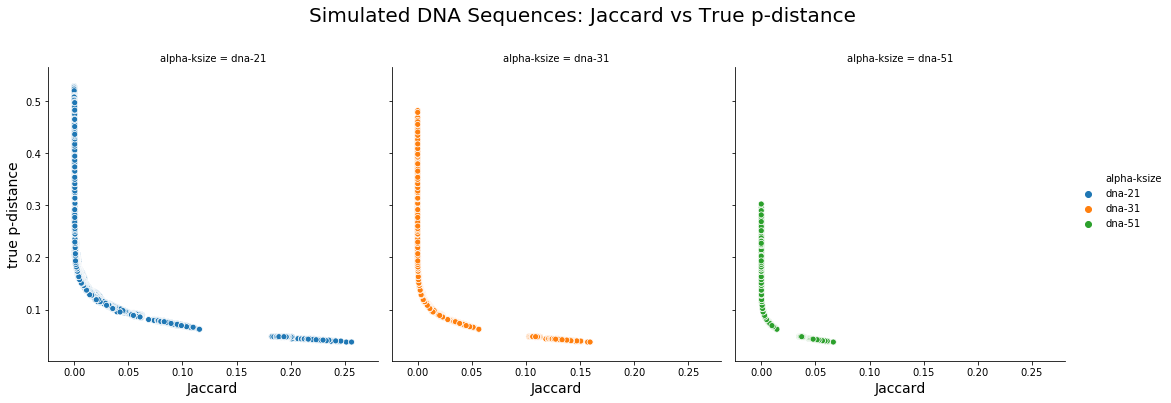

In [42]:
data_to_plot = m1DF # select dataframe to plot with
g = sns.relplot(data=data_to_plot, x="jaccard", y="true p-distance", col="alpha-ksize", hue="alpha-ksize")#, palette="GnBu_d")
#g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.1), yticks=np.arange(0, 0.60, 0.1))
#xlim=None
for ax in g.fig.axes:
#    if not xlim:
#        xlim =ax.get_xlim()
#        ylim = ax.get_ylim()
#    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("Jaccard", size=14)
    ax.set_ylabel("true p-distance", size=14)
#g.add_legend()
#g.fig.suptitle("Explore p-distance estimates at scaled=1", x=0.5, y=1.10, size=20)
g.fig.suptitle("Simulated DNA Sequences: Jaccard vs True p-distance", x=0.5, y=1.10, size=20)

In [ ]:

aai_colors = {"protein-k7 AAI":"#0b559f", "protein-k10 AAI":"#89bedc", "compareM":"#c44e52"}

sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15}):
    sns.set_style("ticks")
    g = sns.displot(data=mean_cluster_aai, x="AAI", hue="estimator", kde=True, palette=aai_colors, hue_order= ["compareM"], legend=False)
    g.set(xlim=(0.3, 1))
    plt.gcf().set_size_inches(10, 4)
    for ax in g.axes.flat:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    plt.xlabel("CompareM AAI (%)", size=15, labelpad=15)
    plt.ylabel("Cluster Count", size=15, labelpad=15)
    plt.title('Mean AAI of 100 vContact2 Clusters (pigeon 1.0)', size=17)
    g.savefig("pigeon-clusters.100.compareM-AAI.png",bbox_inches='tight')
    

Text(0.5, 1.1, 'Simulated DNA Sequences: Jaccard vs True ANI')

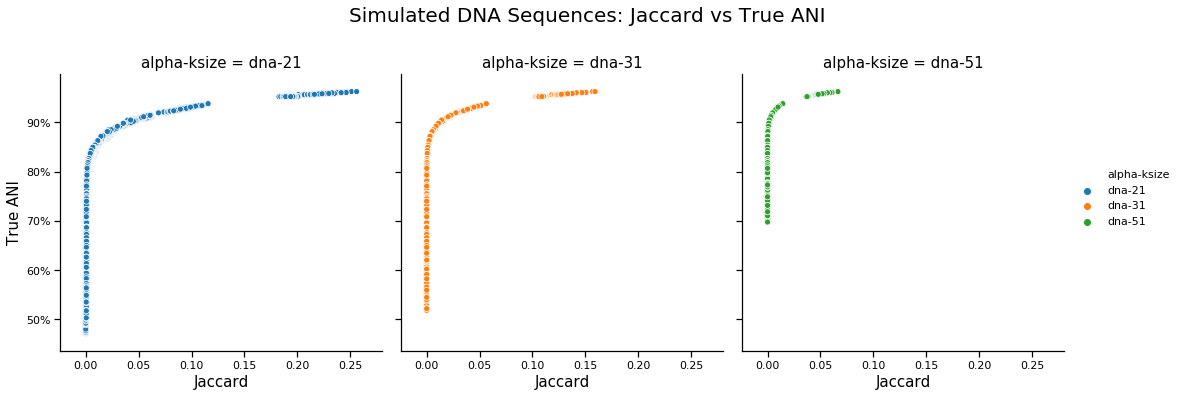

In [58]:
data_to_plot = m1DF # select dataframe to plot with
with sns.plotting_context("notebook", rc={"font.size":12,"axes.titlesize":10,"axes.labelsize":15}):
    g = sns.relplot(data=data_to_plot, x="jaccard", y="true ANI", col="alpha-ksize", hue="alpha-ksize")#, palette="GnBu_d")
    for ax in g.fig.axes:
        ax.set_xlabel("Jaccard")#, size=15)
        ax.set_ylabel("True ANI")#, size=15)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

g.fig.suptitle("Simulated DNA Sequences: Jaccard vs True ANI", x=0.5, y=1.10, size=20)

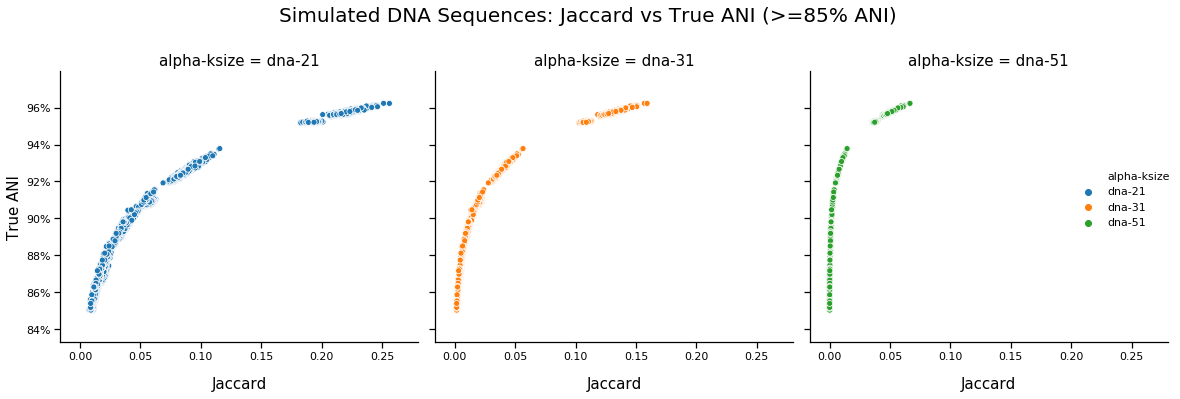

In [69]:
# Zoom in on 0.85 ANI and above and above
aDF = m1DF[m1DF["true ANI"] >= 0.85]

data_to_plot = aDF # select dataframe to plot with
with sns.plotting_context("notebook", rc={"font.size":12,"axes.titlesize":10,"axes.labelsize":15}):
    g = sns.relplot(data=data_to_plot, x="jaccard", y="true ANI", col="alpha-ksize", hue="alpha-ksize")#, palette="GnBu_d")
    for ax in g.fig.axes:
        ax.set_xlabel("Jaccard", labelpad=15)#, size=15)
        ax.set_ylabel("True ANI")#, size=15)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

g.fig.suptitle("Simulated DNA Sequences: Jaccard vs True ANI (>=85% ANI)", x=0.5, y=1.10, size=20)
g.fig.tight_layout()

# get average ANI at Jaccard = 0.1

In [78]:
# any ksize
j1 = m1DF[(m1DF["jaccard"] >=0.097) & (m1DF["jaccard"] <=0.102)]["true ANI"].mean()
j1

0.93034783935483867

In [80]:
# assess by ksize

k21 = m1DF[m1DF["ksize"] == 21]
k31 = m1DF[m1DF["ksize"] == 31]
k51 = m1DF[m1DF["ksize"] == 51]


In [81]:
k21[(k21["jaccard"] >=0.097) & (k21["jaccard"] <=0.102)]["true ANI"].mean()

0.93034783935483867

In [82]:
k31[(k31["jaccard"] >=0.097) & (k31["jaccard"] <=0.102)]["true ANI"].mean()

nan

In [83]:
k51[(k51["jaccard"] >=0.097) & (k51["jaccard"] <=0.102)]["true ANI"].mean()

nan